In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
no_processing_pcks = [0.234] * 30
baseline_pcks = [0.76958656, 0.77567729, 0.7629215 , 0.76866991, 0.78222534, 0.77479955, 0.78586148, 0.76024993, 0.76337535, 0.77671771, 0.75709171, 0.76669217, 0.77107396, 0.81828279, 0.81888248, 0.81302254, 0.82203523]
unipose_pcks = [0.7915688 , 0.79262183, 0.78783522, 0.77886668, 0.78456231, 0.78456119, 0.78456586, 0.78455771, 0.784562  , 0.78456487, 0.78456938, 0.78456344, 0.78456935, 0.78455966, 0.78456648, 0.78456345, 0.78456494]
deciwatch_pcks = [0.81288728, 0.81304934, 0.81298166, 0.81299424, 0.81298312, 0.81306767, 0.81302996, 0.81308089, 0.81311565, 0.81311276, 0.81314956, 0.81313838, 0.81312317, 0.81314814, 0.81316578, 0.81315169, 0.81311293, 0.81314158, 0.81314245, 0.81313032, 0.81313584, 0.81314727, 0.81315901, 0.81313996, 0.81314392, 0.81315183, 0.81313582]

pcks = [
    no_processing_pcks,
    baseline_pcks,
    unipose_pcks,
    deciwatch_pcks
]

labels = [
    "no processing",
    "conv3d",
    "bi-LSTM",
    "transformer"
]

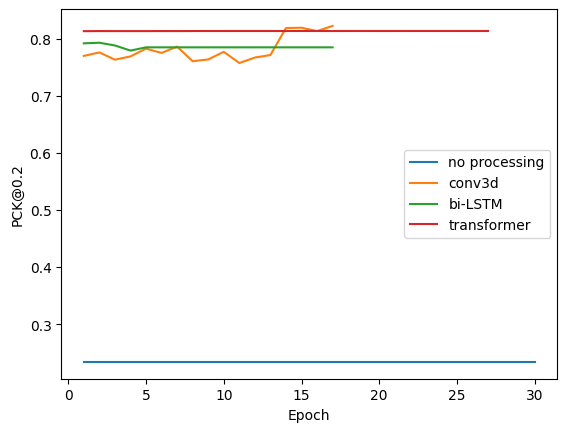

In [92]:
plt.figure()

for i in range(len(pcks)):
    pck = pcks[i]
    epochs = np.arange(1, len(pck) + 1)
    label = labels[i]
    
    plt.plot(epochs, pck, label=label)
    
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [1]:
import torchvision

In [3]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

c:\Users\André\Desktop\master_thesis\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\André\Desktop\master_thesis\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [63]:
import torch

In [64]:
import matplotlib.pyplot as plt
from skimage.transform import resize

data = plt.imread(r"C:\Users\André\Desktop\photo-1608111064768-8c78b7656f32.jpg")
data = resize(data, (1920, 1080))
data = torch.from_numpy(data)
data = data.permute(2, 0, 1).unsqueeze(0)
data = data.float()
res = model(data)

In [85]:
torch.max(res[0]["keypoints"])

tensor(1834.2535, grad_fn=<MaxBackward1>)

In [79]:
res[0]["keypoints"].shape

torch.Size([4, 17, 3])

In [84]:
res[0]["keypoints"]

tensor([[[5.7870e+02, 1.7351e+02, 1.0000e+00],
         [6.4069e+02, 1.4039e+02, 1.0000e+00],
         [5.1960e+02, 1.3751e+02, 1.0000e+00],
         [7.0412e+02, 1.7351e+02, 1.0000e+00],
         [4.0140e+02, 1.7063e+02, 1.0000e+00],
         [8.7278e+02, 4.1541e+02, 1.0000e+00],
         [1.7652e+02, 3.8230e+02, 1.0000e+00],
         [1.0040e+03, 6.5156e+02, 1.0000e+00],
         [1.5490e+02, 6.4868e+02, 1.0000e+00],
         [7.4304e+02, 8.4019e+02, 1.0000e+00],
         [6.2916e+02, 8.2147e+02, 1.0000e+00],
         [7.8773e+02, 9.7554e+02, 1.0000e+00],
         [3.2211e+02, 9.6258e+02, 1.0000e+00],
         [7.7764e+02, 1.3773e+03, 1.0000e+00],
         [3.0337e+02, 1.3888e+03, 1.0000e+00],
         [7.4736e+02, 1.7272e+03, 1.0000e+00],
         [2.6733e+02, 1.8006e+03, 1.0000e+00]],

        [[5.8206e+02, 1.7770e+02, 1.0000e+00],
         [6.4259e+02, 1.4606e+02, 1.0000e+00],
         [5.1144e+02, 1.3599e+02, 1.0000e+00],
         [7.0600e+02, 1.8057e+02, 1.0000e+00],
         [3